# Data Storytelling Project: SAT New York

**Objectives:**
* Analyse SAT scores + demographics and any other relevant information available
* Check fairness of the [SAT](https://www.insidehighered.com/news/2010/06/21/sat)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Understanding the data

### Read data into dataframe, put each dataframe into a dictionary

In [2]:
files = ["AP_results.csv", "Class_size.csv", "Demographics.csv", "Graduation_outcomes.csv", "hsdirectory.csv", "Math_test_results.csv", "SAT_results.csv"]
data = {}
for f in files:
    print f
    d = pd.read_csv("data/{}".format(f))
    data[f.replace(".csv", "")] = d

AP_results.csv
Class_size.csv
Demographics.csv
Graduation_outcomes.csv
hsdirectory.csv
Math_test_results.csv
SAT_results.csv


### Check dictionary

In [3]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


Math_test_results

      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   
3  01M015     3  2009  All Students             33              668         0   
4  01M015     3  2010  All Students             26              677         6   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0      5.1%        11     28.2%        20     51.3%         6     15.4%   
1      6.5%         3      9.7%        22       71%         4     12.9%   
2        0%         6     16.2%        29     78.4%         2      5.4%   
3        0%         4     12.1%        28     84.8%         1        3%   
4     23.1%        12     46.2%         6     23.1%         2      7.7%   

  Level 3+4 # Level 3+4 %  
0          26 

**Patterns/preliminary analysis:**

* District Borough Number (DBN): Math_test_results, SAT_results, Demographics, AP_results, Graduation_outcomes, hsdirectory
* School name: SAT_results, AP_results, Graduation_outcomes, Class_size, hsdirectory
* Location1 field in hsdirectory can be used for maps

### Data unification  

This makes working with all the data an easier process.
DBN is a common column, it just doesnt appear in Class_size - unless School code is DBN.

I will check how DBN looks and compare against Class_size to try to recognize a pattern

In [4]:
data["AP_results"]["DBN"].head()

0    01M448
1    01M450
2    01M515
3    01M539
4    02M296
Name: DBN, dtype: object

In [5]:
data["Class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


It looks like DBN is combination of CSD, BOROUGH, and SCHOOL CODE.

from [string format](https://docs.python.org/2/library/stdtypes.html#str.format) [documentation](https://docs.python.org/3/library/string.html#format-string-syntax):

{:02d}

02d formats an integer (d) to a field of minimum width 2 (2), with zero-padding on the left (leading 0)


In [6]:
data["Class_size"]["DBN"] = data["Class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hsdirectory"].rename(columns={'dbn': 'DBN'}, inplace=True)

In [7]:
data["Class_size"].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015


I will now combine the survey data into one:

In [8]:
survey1 = pd.read_csv("./data/survey/masterfile11_gened_final.txt", delimiter="\t")
survey2 = pd.read_csv("./data/survey/masterfile11_d75_final.txt", delimiter="\t")

In [9]:
survey1.head(3)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
survey2.head(3)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0


Add 'False' to the d75 field in survey one (which corresponds to all schools) and 'True' to survey2 (which corresponds to school district 75)

In [11]:
survey1["d75"] = False
survey2["d75"] = True

Concatenate survey1 and survey2 vertically

In [12]:
survey = pd.concat([survey1, survey2], axis=0)

In [13]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


Check data dictionary file (Survey Data Dictionary.xls) to define which columns are relevant

In [14]:
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]

In [15]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5,DBN
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0,01M015
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0,01M019
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0,01M020
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0,01M034
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0,01M063


In [16]:
# getting only the relevant fields
# note that '.loc' was used because it works on lables. If I was working on the positions in the index, I would use iloc
survey = survey.loc[:,survey_fields]

In [17]:
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


I need to add the survey to the data dictionary

In [18]:
data["survey"] = survey
#survey.shape

In [19]:
data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


### Checking the datasets

In [20]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head(3))


Math_test_results

      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0      5.1%        11     28.2%        20     51.3%         6     15.4%   
1      6.5%         3      9.7%        22       71%         4     12.9%   
2        0%         6     16.2%        29     78.4%         2      5.4%   

  Level 3+4 # Level 3+4 %  
0          26       66.7%  
1          26       83.9%  
2          31       83.8%  

SAT_results

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNIT

Math_test_results, Demographics, Graduation_outcomes, Class_size have several rows for each high school (DBN and School name fields).

I will need to find a way to condensate the datasets above to "one row per high school". If that is not done, it won't be possible to compare the datasets.

** Class_size:**

In [21]:
data["Class_size"]

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01M015


It looks like grade 9-12 corresponds to what I [want](https://www.justlanded.com/english/United-States/USA-Guide/Education/The-American-school-system).

From the dataset [description](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3), I've learnt that there are 3 program types:

"Average class sizes for each school, by grade and program type (General Education, Self-Contained Special Education, Collaborative Team Teaching (CTT)) for grades K-9 (where grade 9 is not reported by subject area), and for grades 5-9 (where available) and 9-12, aggregated by program type (General Education, CTT, and Self-Contained Special Education) and core course (e.g. English 9, Integrated Algebra, US History, etc.)."

I can focus on General Education for now.

To group the data, I will have to average the values. So I will group Class_size by DBN (so the data will be "one row per high school")  and average each column. I will get the average Class_size for each school


In [22]:
Class_size = data["Class_size"]
Class_size = Class_size[Class_size["GRADE "] == "09-12"]
Class_size = Class_size[Class_size["PROGRAM TYPE"] == "GEN ED"]
Class_size = Class_size.groupby("DBN").agg(np.mean)

In [23]:
Class_size.head()

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


DBN is now the index. It needs to be a "normal" column

In [24]:
Class_size.reset_index(inplace=True)
data["Class_size"] = Class_size

In [25]:
data["Class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


**Math_test_results:**

DBN has been entered by Grade and by Year, as data was collected for multiple years for the same schools

In [26]:
data["Math_test_results"]["Year"].max()

2011

The most recent year is 2011, which will be the one I will use then.

In [27]:
data["Math_test_results"] = data["Math_test_results"][data["Math_test_results"]["Year"] == 2011]

In [28]:
data["Math_test_results"].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
5,01M015,3,2011,All Students,28,671,10,35.7%,13,46.4%,5,17.9%,0,0%,5,17.9%
11,01M015,4,2011,All Students,28,668,3,10.7%,14,50%,9,32.1%,2,7.1%,11,39.3%
17,01M015,5,2011,All Students,25,667,5,20%,8,32%,12,48%,0,0%,12,48%
24,01M015,All Grades,2011,All Students,81,669,18,22.2%,35,43.2%,26,32.1%,2,2.5%,28,34.6%
30,01M019,3,2011,All Students,34,679,2,5.9%,23,67.6%,7,20.6%,2,5.9%,9,26.5%


I will also need to select only one Grade, so I will pick the max one which is 8

In [29]:
data["Math_test_results"]["Grade"].dtype

dtype('O')

This is an object type. From [stackoverflow](https://stackoverflow.com/questions/34881079/pandas-distinction-between-str-and-object-types):

"As a very brief explanation that isn't a full answer: If you use a string dtype in numpy, it's fundamentally a fixed-width c-like string. In pandas, they're "normal" python strings, thus the object type"

(That's why it was not working when in the code below I did  == 8)

In [30]:
data["Math_test_results"] = data["Math_test_results"][data["Math_test_results"]["Grade"] == "8"]

In [31]:
data["Math_test_results"].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
111,01M034,8,2011,All Students,48,646,15,31.3%,22,45.8%,11,22.9%,0,0%,11,22.9%
280,01M140,8,2011,All Students,61,665,1,1.6%,43,70.5%,17,27.9%,0,0%,17,27.9%
346,01M184,8,2011,All Students,49,727,0,0%,0,0%,5,10.2%,44,89.8%,49,100%
388,01M188,8,2011,All Students,49,658,10,20.4%,26,53.1%,10,20.4%,3,6.1%,13,26.5%
411,01M292,8,2011,All Students,49,650,15,30.6%,25,51%,7,14.3%,2,4.1%,9,18.4%


**Demographics:**

In [32]:
data["Demographics"]

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


Again data was collected for multiple years for the same school

In [33]:
data["Demographics"]["schoolyear"].dtype

dtype('int64')

In [34]:
data["Demographics"] = data["Demographics"][data["Demographics"]["schoolyear"] == 20112012]

In [35]:
data["Demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


**Graduation_outcomes:**

In [36]:
data["Graduation_outcomes"]

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67%,36,32.1%,48%,...,30,26.8%,40%,39,34.799999999999997%,52%,33,29.5%,4,3.6%
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9%,35,28.9%,54.7%,...,31,25.6%,48.4%,29,24%,45.3%,41,33.9%,11,9.1%


I need to select Cohort == 2006

In [37]:
(data["Graduation_outcomes"]['Cohort'] == '2006').any()

True

In [38]:
data["Graduation_outcomes"]['Cohort'].dtype

dtype('O')

In [39]:
data["Graduation_outcomes"] = data["Graduation_outcomes"][data["Graduation_outcomes"]["Cohort"] == "2006"]
data["Graduation_outcomes"] = data["Graduation_outcomes"][data["Graduation_outcomes"]["Demographic"] == "Total Cohort"]

Check data dictionary

In [40]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


Math_test_results

        DBN Grade  Year      Category  Number Tested Mean Scale Score  \
111  01M034     8  2011  All Students             48              646   
280  01M140     8  2011  All Students             61              665   
346  01M184     8  2011  All Students             49              727   
388  01M188     8  2011  All Students             49              658   
411  01M292     8  2011  All Students             49              650   

    Level 1 # Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 #  \
111        15     31.3%        22     45.8%        11     22.9%         0   
280         1      1.6%        43     70.5%        17     27.9%         0   
346         0        0%         0        0%         5     10.2%        44   
388        10     20.4%        26     53.1%        10     20.4%         3   
411        15     30.6%        25       51%         7     14.3%         2   

    Level 4 % Level 3+4 # Level 3+4 %  
111        0%          11       22.9% 

### Computations

**SAT score:**

I will compute the _Total_ SAT score (SAT Math Avg. Score + SAT Critical Reading Avg. Score + SAT Writing Avg. Score) so I can compare the schools

In [41]:
columns = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in columns:
    data["SAT_results"][c] = data["SAT_results"][c].apply(pd.to_numeric, errors='coerce') #converting string to number

data['SAT_results']['SAT_score'] = data['SAT_results'][columns[0]] + data['SAT_results'][columns[1]] + data['SAT_results'][columns[2]]

In [42]:
data["SAT_results"]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332.0,557.0,316.0,1205.0
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0
7,01M650,CASCADES HIGH SCHOOL,18,417.0,418.0,411.0,1246.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395.0,400.0,387.0,1182.0


**Get schools coordinates for maps:**

hsdirectory has a field 'Location 1' with the lat and lon of each school

In [43]:
data["hsdirectory"]['Location 1'][0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

Step by step:
1. I am creating a lambda function that will split by the string "\n"
2. I will them have 3 parts: '883 Classon Avenue', 'Brooklyn, NY 11225' and '(40.67029890700047, -73.96164787599963)'
3. I know I want the last bit. I can access it by either using [2] or [-1], as it is the last part
4. Then I need to remove both () in (40.67029890700047, -73.96164787599963)
5. I am left with 40.67029890700047, -73.96164787599963; so I will [0] to get lat and [1] to get lon ([-1] would also work for lon).

In [44]:
data["hsdirectory"]['lat'] = data["hsdirectory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hsdirectory"]['lon'] = data["hsdirectory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

In [45]:
data["hsdirectory"]

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",40.67029890700047,-73.96164787599963
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",40.8276026690005,-73.90447525699966
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",40.842414068000494,-73.91616158599965
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",40.71067947100045,-74.00080702099967
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",40.718810094000446,-73.80650045499965
5,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9,11,9,12.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"3000 East Tremont Avenue\nBronx, NY 10461\n(40...",40.840513977000455,-73.83812095999963
6,14K474,PROGRESS High School for Professional Careers,Brooklyn,K450,718-387-0228,718-782-0911,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"850 Grand Street\nBrooklyn, NY 11211\n(40.7119...",40.71196311300048,-73.94043436699963
7,02M420,High School for Health Professions and Human S...,Manhattan,M475,212-780-9175,212-979-7261,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345 East 15Th Street\nNew York, NY 10003\n(40....",40.73248537800049,-73.98305338799963
8,28Q350,Jamaica Gateway to the Sciences,Queens,Q470,718-480-2689,718-480-2697,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"167-01 Gothic Drive\nJamaica, NY 11432\n(40.71...",40.713577459000476,-73.79651782499963
9,29Q313,Benjamin Franklin High School for Finance & In...,Queens,Q490,718-935-3645,NaN,9,10,9,12.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"207-01 116th Avenue\nCambria Heights, NY 11411...",40.6978073300005,-73.74585775499963


In [46]:
columns = ['lat', 'lon']
for c in columns:
    data["hsdirectory"][c] = data["hsdirectory"][c].apply(pd.to_numeric, errors='ignore')

In [47]:
data["hsdirectory"]

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",40.718810,-73.806500
5,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9,11,9,12.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"3000 East Tremont Avenue\nBronx, NY 10461\n(40...",40.840514,-73.838121
6,14K474,PROGRESS High School for Professional Careers,Brooklyn,K450,718-387-0228,718-782-0911,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"850 Grand Street\nBrooklyn, NY 11211\n(40.7119...",40.711963,-73.940434
7,02M420,High School for Health Professions and Human S...,Manhattan,M475,212-780-9175,212-979-7261,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345 East 15Th Street\nNew York, NY 10003\n(40....",40.732485,-73.983053
8,28Q350,Jamaica Gateway to the Sciences,Queens,Q470,718-480-2689,718-480-2697,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"167-01 Gothic Drive\nJamaica, NY 11432\n(40.71...",40.713577,-73.796518
9,29Q313,Benjamin Franklin High School for Finance & In...,Queens,Q490,718-935-3645,NaN,9,10,9,12.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"207-01 116th Avenue\nCambria Heights, NY 11411...",40.697807,-73.745858


It worked!

Check all the data:

In [48]:
for k,v in data.items():
    print(k)
    print(v.head())

Math_test_results
        DBN Grade  Year      Category  Number Tested Mean Scale Score  \
111  01M034     8  2011  All Students             48              646   
280  01M140     8  2011  All Students             61              665   
346  01M184     8  2011  All Students             49              727   
388  01M188     8  2011  All Students             49              658   
411  01M292     8  2011  All Students             49              650   

    Level 1 # Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 #  \
111        15     31.3%        22     45.8%        11     22.9%         0   
280         1      1.6%        43     70.5%        17     27.9%         0   
346         0        0%         0        0%         5     10.2%        44   
388        10     20.4%        26     53.1%        10     20.4%         3   
411        15     30.6%        25       51%         7     14.3%         2   

    Level 4 % Level 3+4 # Level 3+4 %  
111        0%          11       22.9%  


### Use DBN to combine datasets

In [49]:
# get the name of each data:
data_names = [k for k,v in data.items()]
# flat the data:
flat_data = [data[k] for k in data_names]
# get the 1st flat data as the base for the merge:
base_data = flat_data[0]

In [50]:
len(base_data)

499

In [51]:
print "# of DBN present in both is ", sum(data["SAT_results"]["DBN"].isin(data["AP_results"]["DBN"]))
print "Length of DBN in SAT_results is ", len(data["SAT_results"]["DBN"])
print "Length of DBN in AP_results is ",len(data["AP_results"]["DBN"])

# of DBN present in both is  253
Length of DBN in SAT_results is  478
Length of DBN in AP_results is  258


AP results dataset is missing high schools that exist in the SAT_results dataset

In [52]:
print "# of DBN present in both is ", sum(data["SAT_results"]["DBN"].isin(data["Graduation_outcomes"]["DBN"]))
print "Length of DBN in Graduation_outcomes is ",len(data["Graduation_outcomes"]["DBN"])

# of DBN present in both is  389
Length of DBN in Graduation_outcomes is  405


AP_results dataset is missing high schools that exist in the SAT_results dataset

In [53]:
print "# of DBN present in both is ", sum(data["SAT_results"]["DBN"].isin(data["Math_test_results"]["DBN"]))
print "Length of DBN in Math_test_results is ",len(data["Math_test_results"]["DBN"])

# of DBN present in both is  83
Length of DBN in Math_test_results is  499


In [54]:
# this works too:
# len(set(data["SAT_results"]["DBN"]) & set(data["Graduation_outcomes"]["DBN"]))

[Inner join produces only the set of records that match in both Table A and Table B.](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/)

[Outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/)

I will use 'outer' to join SAT_results, Graduation_outcomes and AP_results. So missing values will be filled with null.

Then I will use inner to join the above with Math_test_results.

In [55]:
for i, f in enumerate(flat_data[1:]):
    # i is 0 to n
    # f is the data
    name = data_names[i+1] # I am using [0] as base_data
    print "%s length is %d " % (name, len(name))
    # find out the number of non-unique DBNs: get len of DBN - len unique DBN
    print "non-unique: ", (len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner" 
    if name in ["SAT_results", "AP_results", "Graduation_outcomes"]:
        join_type = "outer"
    if name not in ["Math_test_results"]:
        base_data = base_data.merge(f, on="DBN", how=join_type)
        print join_type



SAT_results length is 11 
non-unique:  0
outer
Demographics length is 12 
non-unique:  0
inner
AP_results length is 10 
non-unique:  1
outer
survey length is 6 
non-unique:  0
inner
Graduation_outcomes length is 19 
non-unique:  0
outer
Class_size length is 10 
non-unique:  0
inner
hsdirectory length is 11 
non-unique:  0
inner


In [56]:
base_data.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,8,2011.0,All Students,49.0,650,15,30.6%,25,51%,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M450,8,2011.0,All Students,55.0,673,2,3.6%,24,43.6%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
2,01M539,8,2011.0,All Students,142.0,724,0,0%,1,0.7%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426
3,02M408,8,2011.0,All Students,30.0,694,0,0%,4,13.3%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"328 West 48 Street\nNew York, NY 10036\n(40.76...",40.761433,-73.988024
4,02M655,8,2011.0,All Students,32.0,654,6,18.8%,17,53.1%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"320 East 96 Street\nNew York, NY 10128\n(40.78...",40.783644,-73.945742


### More convertions

I need to convert the [AP](https://apscore.collegeboard.org/scores/about-ap-scores/) score to number

In [57]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    base_data[col] = base_data[col].apply(pd.to_numeric, errors='coerce')

base_data[cols] = base_data[cols].fillna(value=0)

** get the district number from DBN**

In [58]:
base_data["school_dist"] = base_data["DBN"].apply(lambda x: x[:2])

In [59]:
#base_data.columns[base_data.isnull().any()].tolist()

** missing values**
I will fill with the [mean](https://stats.stackexchange.com/questions/167829/how-do-we-decide-on-how-to-fill-missing-
values-in-data)

[Good read](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

In [60]:
#cols = ['addtl_info1', 'addtl_info2', 'se_services', 'Category', 'priority05', 'priority06', \
  #      'priority07', 'priority08', 'priority09', 'priority10', 'priority02', 'priority04', \
   #     'priority01', 'priority03', 'partner_other', 'partner_financial', 'campus_name']
#for col in cols:
 #   base_data.drop(col, axis=1, inplace=True)

In [61]:
base_data = base_data.fillna(base_data.mean())

#base_data = base_data.groupby(base_data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [62]:
base_data.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,8,2011.0,All Students,49.0,650,15,30.6%,25,51%,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M450,8,2011.0,All Students,55.0,673,2,3.6%,24,43.6%,...,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01
2,01M539,8,2011.0,All Students,142.0,724,0,0%,1,0.7%,...,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426,01
3,02M408,8,2011.0,All Students,30.0,694,0,0%,4,13.3%,...,NaN,NaN,NaN,NaN,NaN,NaN,"328 West 48 Street\nNew York, NY 10036\n(40.76...",40.761433,-73.988024,02
4,02M655,8,2011.0,All Students,32.0,654,6,18.8%,17,53.1%,...,NaN,NaN,NaN,NaN,NaN,NaN,"320 East 96 Street\nNew York, NY 10128\n(40.78...",40.783644,-73.945742,02


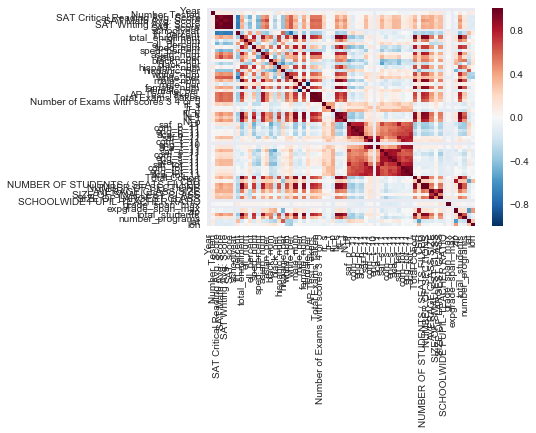

In [63]:
#base_data.corrwith(base_data['SAT_score'])
#f['A'].corr(df['B'])
#base_data.corr()

%matplotlib inline
#data2 = data[list_of_column_names]
corr = base_data.corr(method="pearson")
sns.heatmap(corr)


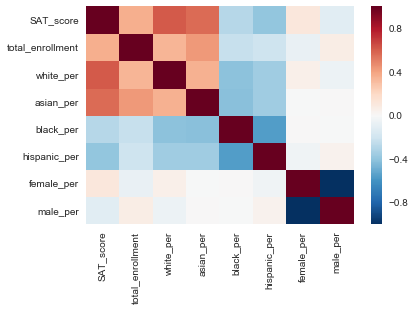

In [64]:
data2 = base_data[['SAT_score', 'total_enrollment', 'white_per', 'asian_per', 'black_per',\
                   'hispanic_per', 'female_per', 'male_per']].copy()
corr2 = data2.corr()
sns.heatmap(corr2)

In [65]:
corr2

,SAT_score,total_enrollment,white_per,asian_per,black_per,hispanic_per,female_per,male_per
SAT_score,1.000000,0.366820,0.610086,0.568627,-0.282791,-0.392637,0.110193,-0.110148
total_enrollment,0.366820,1.000000,0.342339,0.435225,-0.233540,-0.204362,-0.074943,0.074971
white_per,0.610086,0.342339,1.000000,0.355057,-0.410711,-0.354608,0.060630,-0.060598
asian_per,0.568627,0.435225,0.355057,1.000000,-0.415301,-0.358599,-0.000725,0.000759
black_per,-0.282791,-0.233540,-0.410711,-0.415301,1.000000,-0.561377,0.006746,-0.006744
hispanic_per,-0.392637,-0.204362,-0.354608,-0.358599,-0.561377,1.000000,-0.044315,0.044274
female_per,0.110193,-0.074943,0.060630,-0.000725,0.006746,-0.044315,1.000000,-1.000000
male_per,-0.110148,0.074971,-0.060598,0.000759,-0.006744,0.044274,-1.000000,1.000000
